In [1]:
import os
import sys
from pathlib import Path
import torch
import numpy as np
import yaml

if os.path.abspath('..') not in sys.path:
    sys.path.append(os.path.abspath('..'))
from t_core import volume_tools as vt
from t_core import fields

Create base volume on which to operate

In [2]:
vol = vt.make_volume((300,300,300), speckle_size=7, convolution_kernel=7)

Create field which is a superposition of 2 Gaussian localised fields

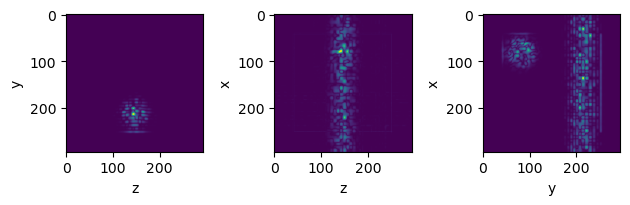

In [3]:

f = fields.AdditiveFieldArray([
    fields.GaussianDisplacementField((0.0,0.1,0.1),(0.0,0.05,0.0),(0.45,0.45,0.0)),
    fields.GaussianDisplacementField((0.1,0.1,0.1),(0.05,0.05,0.05),(-0.45,-0.45,0.0))
])
vol_A = f(vol)
vt.plot_volume(np.abs(vol - vol_A))

For reproducibility, we can save the field to file and load it back

In [4]:
with open('fields.yaml', 'w') as fout:
    yaml.dump(f.to_dict(), fout)

with open('fields.yaml', 'r') as fin:
    d = yaml.load(fin, Loader=yaml.FullLoader)
print(d)

f2 = fields.AdditiveFieldArray.from_dict(d)

{'class': 'AdditiveFieldArray', 'fields': [{'A_xyz': (0.0, 0.05, 0.0), 'class': 'GaussianDisplacementField', 'r0_xyz': (0.45, 0.45, 0.0), 'sigma_xyz': (0.0, 0.1, 0.1)}, {'A_xyz': (0.05, 0.05, 0.05), 'class': 'GaussianDisplacementField', 'r0_xyz': (-0.45, -0.45, 0.0), 'sigma_xyz': (0.1, 0.1, 0.1)}]}


Verify that it's giving the same displacement

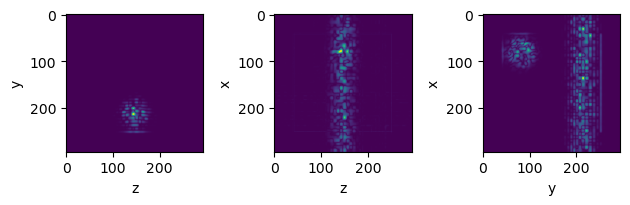

True

In [5]:
vol_B = f2(vol)
vt.plot_volume(np.abs(vol - vol_B))
np.allclose(vol_A, vol_B)

Other fields are also supported

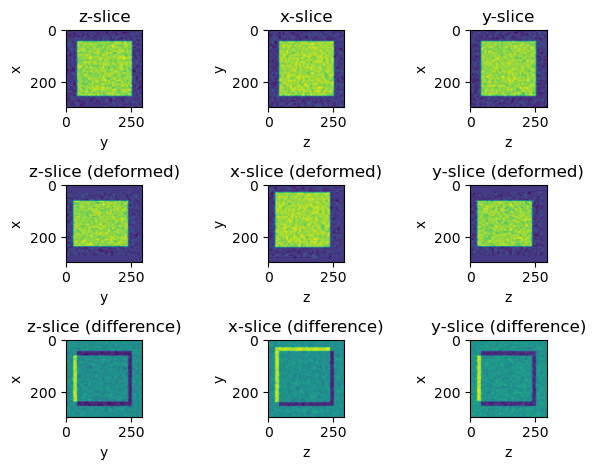

In [6]:
f = fields.AdditiveFieldArray([
    fields.UniformDisplacementField((0.0,0.1,0.1)),
    fields.UniformStrainDisplacementField((0.2,0.0,0.0))
])
vol_A = f(vol)
vt.plot_undef_def_slices(vol, vol_A)